In [286]:
from pandas.io.sas.sas_constants import os_name_offset

"""
Clase: rnn

Objetivo: modelo

Cambios:

    1. Creacion de modelo aquesada 07-07-2025
"""

'\nClase: rnn\n\nObjetivo: modelo\n\nCambios:\n\n    1. Creacion de modelo aquesada 07-07-2025\n'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from src.utils.metrics import obtener_ruta_app
import os



In [2]:
ruta = os.path.join(obtener_ruta_app(),"data/processed/ANN/recomendaciones.csv")

df = pd.read_csv(ruta,encoding = "ISO-8859-1",delimiter=',')

In [3]:
df.drop(columns=["YEAR", "MONTH"], inplace=True)

In [4]:
X = df.drop('Recomendacion',axis=1).values

In [5]:
y = df['Recomendacion']

In [6]:
y = pd.get_dummies(y)

In [7]:
y = y.values

In [8]:
y

array([[False,  True, False],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False,  True, False],
       [False, False,  True]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [10]:
X_train.shape

(396, 5)

In [11]:
X_test.shape

(132, 5)

In [12]:
model = Sequential()
# Elegir número de capas (layers)
#https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
num_neuronas = X_train.shape[1]
# Indicar tantas neuronas de salida como clases a predecir, en este caso 3 (variable "Interest_Rate")
num_neuronas_salida = len(df["Recomendacion"].unique())
#Capa inicial usando Input
model.add(Dense(units=num_neuronas, activation='relu'))
model.add(Dense(units=num_neuronas, activation='relu'))
model.add(Dense(num_neuronas_salida, activation='softmax'))  # softmax para multiclase - softmax activation distribuye la probabilidad sobre cada nodo de salida (clase)

# Para clasificación multiclase "categorical_crossentropy"
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

In [13]:
# Convertir y_train de one-hot a etiquetas numéricas para calcular pesos de clase,ayudan a balancear el entrenamiento.
y_raw = np.argmax(y_train, axis=1) + 1

# Calcular pesos de clase
clases = np.unique(y_raw)
pesos = compute_class_weight(class_weight='balanced', classes=clases, y=y_raw)
pesos_dict = dict(zip(clases, pesos))


In [14]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [15]:
# Entrenar el modelo
model.fit(x=X_train,
          y=y_train,
          epochs=500,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop],
           class_weight=pesos_dict
          )

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - categorical_accuracy: 0.2795 - loss: 1.1326 - val_categorical_accuracy: 0.2045 - val_loss: 1.1126
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - categorical_accuracy: 0.2745 - loss: 1.1303 - val_categorical_accuracy: 0.1970 - val_loss: 1.1103
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.3120 - loss: 1.1298 - val_categorical_accuracy: 0.2500 - val_loss: 1.1080
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - categorical_accuracy: 0.3695 - loss: 1.1258 - val_categorical_accuracy: 0.3030 - val_loss: 1.1059
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - categorical_accuracy: 0.4186 - loss: 1.1232 - val_categorical_accuracy: 0.4015 - val_loss: 1.1037
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - categorical_accuracy: 0.4513 - loss: 1.1239 - val_categorical_accuracy: 0.4773 - val_loss: 1.1016
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 0.5002 - loss: 1.119

<Axes: >

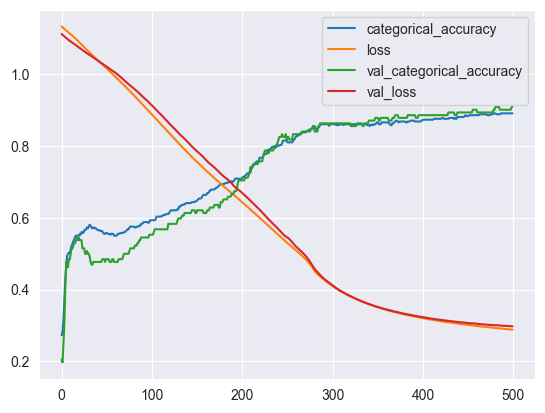

In [16]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [38]:
#Evaluacion del Modelo


In [17]:
#Predicción

predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [18]:
y_test

array([[False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [Fa

In [19]:
predictions

array([[3.35280574e-03, 9.94995594e-01, 1.65153295e-03],
       [6.04596853e-01, 3.94411683e-01, 9.91454348e-04],
       [8.40844691e-01, 1.57014981e-01, 2.14033667e-03],
       [1.80438813e-02, 9.75239336e-01, 6.71672495e-03],
       [3.56411748e-02, 9.12894428e-01, 5.14643937e-02],
       [8.16940591e-02, 1.21022977e-01, 7.97282994e-01],
       [1.74169394e-03, 9.97096062e-01, 1.16223260e-03],
       [8.95882487e-01, 2.35635862e-02, 8.05539861e-02],
       [6.84197769e-02, 3.68446819e-02, 8.94735515e-01],
       [7.42925927e-02, 1.30326971e-02, 9.12674665e-01],
       [2.94803288e-02, 6.81403652e-02, 9.02379274e-01],
       [6.45108968e-02, 6.36502206e-02, 8.71838868e-01],
       [2.82172989e-02, 8.86638105e-01, 8.51445720e-02],
       [5.25131896e-02, 7.64240623e-02, 8.71062696e-01],
       [3.81268142e-03, 9.95772421e-01, 4.14903916e-04],
       [7.38075376e-02, 1.00616291e-01, 8.25576186e-01],
       [4.12668772e-02, 6.66062593e-01, 2.92670518e-01],
       [1.04859984e-02, 4.77903

In [20]:
predictions_lab = np.argmax(model.predict(X_test), axis=-1)#Utilizando la nueva versión de scikit-learn

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [21]:
## Predice las clases para X_test y obtiene el índice de la clase con mayor probabilidad
predictions_lab

array([1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1,
       1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2,
       0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1])

In [22]:
# Ajustar las predicciones
predictions_lab_real = predictions_lab+1

In [23]:
predictions_lab_real

array([2, 1, 1, 2, 2, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 1, 1, 3, 2,
       2, 3, 2, 3, 1, 1, 3, 2, 1, 2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 3,
       3, 1, 3, 3, 2, 1, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3,
       1, 3, 2, 3, 3, 2, 2, 1, 2, 3, 1, 1, 3, 2, 3, 3, 1, 2, 2, 1, 2, 2,
       3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 2, 3, 3, 1, 2, 3, 3, 1, 1, 2,
       1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 3, 3, 2, 1, 2, 3, 3, 3, 1, 2, 2, 2])

In [24]:
df_test_lab = pd.DataFrame(y_test, columns = ['Riego','Fertilización','Poda Preventiva'])

In [25]:
df_test_lab

,Riego,Fertilización,Poda Preventiva
0,False,True,False
1,True,False,False
2,True,False,False
3,False,True,False
4,False,True,False
...,...,...,...
127,False,False,True
128,False,True,False
129,False,True,False
130,False,True,False


In [26]:
df_test_lab["Clase Real"] = df_test_lab[["Riego", "Fertilización", "Poda Preventiva"]].values.argmax(axis=1) + 1

In [27]:
df_test_lab["Clase Real"]

0      2
1      1
2      1
3      2
4      2
      ..
127    3
128    2
129    2
130    2
131    2
Name: Clase Real, Length: 132, dtype: int64

In [28]:
clases=[1, 2, 3]

In [29]:
#Convertir Clase Real en un array
array_clase_real = df_test_lab["Clase Real"].to_numpy()

In [30]:
#Generar la Matriz de confusion
confusion_matrix(array_clase_real, predictions_lab_real, labels=clases)

array([[31,  0,  6],
       [ 4, 48,  1],
       [ 0,  1, 41]])

In [31]:
#Funcion para mostrar Matrix de confusion
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix sin normalizar
[[31  0  6]
 [ 4 48  1]
 [ 0  1 41]]


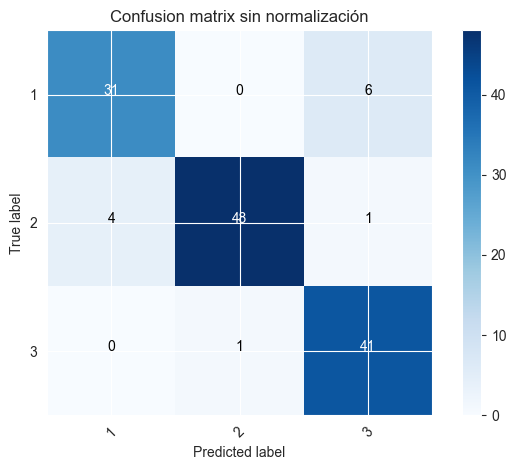

In [32]:
#Mostrar grafico de Matrix de confusion
cnf_matrix = confusion_matrix(array_clase_real, predictions_lab_real, labels=clases)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases,
                      title='Confusion matrix sin normalización')

In [33]:
#Verificar el % de aciertos
print(classification_report(array_clase_real, predictions_lab_real))

              precision    recall  f1-score   support

           1       0.89      0.84      0.86        37
           2       0.98      0.91      0.94        53
           3       0.85      0.98      0.91        42

    accuracy                           0.91       132
   macro avg       0.91      0.91      0.90       132
weighted avg       0.91      0.91      0.91       132



In [34]:
# Predicción sobre nuevos datos

#Guardar Dataset preprocesado
df.to_csv('rnn_papa_preprocessed.csv', index=False)


In [35]:
#Cargar Dataset Preprocesado
df_pred = pd.read_csv('../data/processed/ANN/rnn_papa_preprocessed.csv')
df_pred.head()

,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,0.100886,0.066351,0.364952,0.731096,0.632721,1
1,0.126300,0.142180,0.337621,0.761342,0.687813,3
2,0.052368,0.330569,0.615756,0.722590,0.520868,3
3,0.025799,0.040284,0.196141,0.665879,0.631052,1
4,0.073931,0.013033,0.393891,0.644612,0.836394,1


In [36]:
#Eliminar columnas y scalar con resultados anteriores
X_pred = df_pred.drop(['Recomendacion'], axis=1).values


In [37]:
df['Recomendacion'].value_counts()

Recomendacion
2    214
3    167
1    147
Name: count, dtype: int64

In [38]:
#Escalar df
escalador = MinMaxScaler()

# columnas numéricas:
normalizar = ['lluvia_mm', 'temp_max', 'temp_min', 'humedad', 'ph_suelo']

# Aplica la normalización
df[normalizar] = escalador.fit_transform(df[normalizar])


In [39]:
X_pred = escalador.transform(X_pred)
#Realizar predicción
resultado = np.argmax(model.predict(X_pred), axis=-1) + 1

#Unir en un dataframe los datos a predecir con su predicción
df_pred['PREDICCIÓN']=pd.DataFrame(resultado)
df_pred

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\ale23\Desktop\CUC\REPOS-CUC\AgroIA\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion,PREDICCIÓN
0,0.100886,0.066351,0.364952,0.731096,0.632721,1,3
1,0.126300,0.142180,0.337621,0.761342,0.687813,3,3
2,0.052368,0.330569,0.615756,0.722590,0.520868,3,1
3,0.025799,0.040284,0.196141,0.665879,0.631052,1,3
4,0.073931,0.013033,0.393891,0.644612,0.836394,1,3
...,...,...,...,...,...,...,...
523,0.413939,0.109005,0.265273,0.876654,0.879800,3,3
524,0.160185,0.151659,0.731511,0.864367,0.661102,3,3
525,0.129765,0.092417,0.570740,0.829868,0.181970,2,2
526,0.185599,0.279621,0.765273,0.864839,0.485810,2,2


In [40]:
# Guardar df con predicciones
df_pred.to_csv('predicciones.csv', index=False)

In [41]:
#Guardar el modelo
from tensorflow.keras.models import load_model
model.save('modelo_pred_cultivopapa.h5')